In [1]:
import numpy as np
import pandas as pd
p = print

# Problem Understanding

Your Real Estate partner in California needs your help with pricing homes at the optimal level<br>

Help them to predict the expected sale value of properties in their State and you will get slice of their additional sales commission 💸

# Data Understanding

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
p(data['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
X = pd.DataFrame(data['data'],columns=data['feature_names'])
y = data['target']

p("The target variable: {}".format(y))
p("-------------------")
p("")

p("The independent variables:")
X.head()

The target variable: [4.526 3.585 3.521 ... 0.923 0.847 0.894]
-------------------

The independent variables:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


### Checking multicollinearity

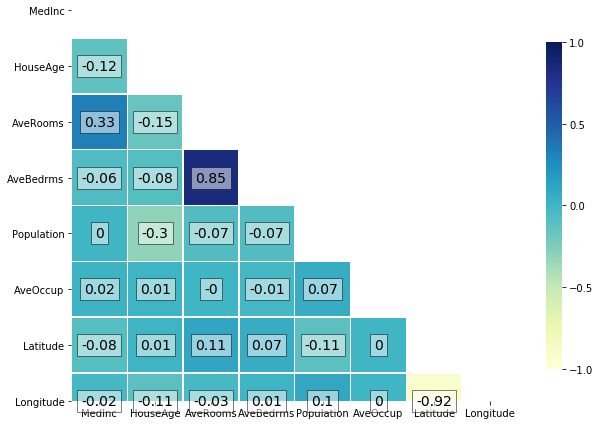

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 15)) 
corr_matrix = X.corr()
mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(round(X.corr(),2), 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = "YlGnBu",
                      cbar_kws = {"shrink": .4, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 14, "color" : "black", "backgroundcolor": "white", "bbox": dict(facecolor='white', alpha=0.5)})
#add the column names as labels
ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

# Data preparation

### Splitting IVs (X), and target (y) data into train and test splits

In [5]:
from sklearn.model_selection import train_test_split
X_train_raw, X_test, y_train_raw, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Splitting train data to train and validation data splits 

In [6]:
# from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(X_train_raw, y_train_raw,test_size=0.2, random_state=111)


### Scaling the datasets using StandardScaler to z-scores

In [7]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

**Just for reference:**

X_train_raw ; y_train_raw  ; Size = 0.8
       
    X_train ;   y_train    ; Size = 0.64

    X_val   ;     y_val    ; Size = 0.16

X_test  ; y_test   ; Size = 0.20

    X_test  ;     y_test   ; Size = 0.20
__________________________________________________________________________
**for LINEAR REGRESSION:**
    
    !!!from sklearn.linear_model import LinearRegression!!!
    
    lin_reg = LinearRegression() #-----------------------initialising----------------#

**learner and training score:**

    lin_reg.fit(X_train ,y_train) #----------------------learning process------------#

    lin_score = lin_reg.score(X_train ,y_train) #--------training score process------#

**validation score:**

    val_score = lin_reg.score(X_val ,y_val) #------------validation score process----#

**extra analysis:**

getting parameters:

    parameters = lin_reg.coef_
    coef_df = pd.DataFrame(parameters, X.columns, columns=['linear_coefficients'])  

getting predicted values:

    y_pg.predict(X_val) #------------------------------model's predicted values-------#

error analysis:

    !!!from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error!!!

    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2_score = r2_score(y_val, y_pred)
__________________________________________________________________________
**for LASSO:**

    !!!from sklearn.linear_model import Lasso!!!

    lasso = Lasso() #------------------------------------initialising-----------------#

**learner and training score:**

    lasso.fit(X_train, y_train) #------------------------learning process-------------#
    
    las_score = lasso.score(X_train, y_train) #---------training score process-------#

**validation score:**

    val_score = lasso.score(X_val, y_val) #--------------validation score process-----#

**extra analysis:**

getting parameters:

    parameters = lasso.coef_
    coef_df['lasso_coef'] = parameters

getting predicted values:

    y_pred = lasso.predict(X_val) #--------------------model's predicted values-------#

error analysis:

    !!from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error!!

    mae = mean_absolute_error(y_val, y_pred)
    mse = mean_squared_error(y_val, y_pred)
    r2_score = r2_score(y_val, y_pred)


# Modelling and Model Evaluation

### Training a linear regression model

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
p("Train score:")
p(lin_reg.score(X_train,y_train))
p("___________________")
p("Validation score:")
p(lin_reg.score(X_val,y_val))
parameters = lin_reg.coef_
coef_df = pd.DataFrame(parameters, X.columns, columns=['linear_coef'])  
coef_df

Train score:
0.6213885075776282
___________________
Validation score:
0.5766770409276389


,linear_coef
MedInc,0.866547
HouseAge,0.128225
AveRooms,-0.293936
AveBedrms,0.338271
Population,-0.000290
AveOccup,-0.042510
Latitude,-0.881091
Longitude,-0.857321


### Viewing the linear prediction vs validation (truth) set

In [9]:
y_pred = lin_reg.predict(X_val)

df = pd.DataFrame({'validation': y_val, 'linear_predicted': y_pred})
p("The model has returned its predicted values of the validation sample")
df['linear_abs_difference'] = abs(df['validation'] - df['linear_predicted'])
df.head()

The model has returned its predicted values of the validation sample


,validation,linear_predicted,linear_abs_difference
0,2.826,1.987208,0.838792
1,2.056,1.273920,0.782080
2,1.958,2.401762,0.443762
3,4.202,2.956576,1.245424
4,1.218,1.945157,0.727157


### Calculating R-squared, MSE and MAE manually

In [10]:
mean_abs_err = df['linear_abs_difference'].sum()/len(df)
mean_sq_err = sum(df['linear_abs_difference'].map(lambda x: x**2))/len(df)
root_mean_sq_err = np.sqrt(mean_sq_err)
p("MAE: ", mean_abs_err)
p("MSE: ", mean_sq_err)
p("RMSE: ", root_mean_sq_err)
p("R^2 Score: ") #Equation?

MAE:  0.5454070814126395
MSE:  0.5697588874797633
RMSE:  0.7548237459697219
R^2 Score: 


### Calculating R-squared, MSE and MAE using sklearn.metrics

In [11]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#
p('MAE', mean_absolute_error(y_val, y_pred))  
p('MSE:', mean_squared_error(y_val, y_pred))  
p('RMSE:', np.sqrt(mean_squared_error(y_val, y_pred)))
p('R^2 Score:', r2_score(y_val, y_pred))

MAE 0.5454070814126395
MSE: 0.5697588874797632
RMSE: 0.7548237459697219
R^2 Score: 0.5766770409276389


### Train a LASSO model

In [12]:
from sklearn.linear_model import Lasso

lasso = Lasso(.2)
lasso.fit(X_train, y_train)
p("Train score:")
p(lasso.score(X_train, y_train))
p("___________________")
p("Validation score:")
p(lasso.score(X_val, y_val))

parameters = lasso.coef_
coef_df['lasso_coef'] = parameters
p("___________________")
p("Coefs of both methods:")
coef_df

Train score:
0.45671475439125386
___________________
Validation score:
0.41717993056903846
___________________
Coefs of both methods:


,linear_coef,lasso_coef
MedInc,0.866547,0.6059
HouseAge,0.128225,0.0000
AveRooms,-0.293936,-0.0000
AveBedrms,0.338271,-0.0000
Population,-0.000290,-0.0000
AveOccup,-0.042510,-0.0000
Latitude,-0.881091,-0.0000
Longitude,-0.857321,-0.0000


### Viewing the lasso prediction vs linear prediction vs validation (truth) set 

In [13]:
# Lets see how the two models differ:
lasso_pred = lasso.predict(X_val)  
df['lasso_predicted'] = lasso_pred
df['lasso_abs_difference'] = abs(df['validation'] - df['lasso_predicted'])

df.head()

,validation,linear_predicted,linear_abs_difference,lasso_predicted,lasso_abs_difference
0,2.826,1.987208,0.838792,1.837643,0.988357
1,2.056,1.273920,0.782080,1.300178,0.755822
2,1.958,2.401762,0.443762,2.066363,0.108363
3,4.202,2.956576,1.245424,2.472746,1.729254
4,1.218,1.945157,0.727157,2.025842,0.807842


### Calculating R-squared, MSE and MAE using sklearn.metrics

In [14]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

p('MAE', mean_absolute_error(y_val, y_pred))  
p('MSE:', mean_squared_error(y_val, y_pred))  
p('RMSE:', np.sqrt(mean_squared_error(y_val, y_pred)))
p('R^2 Score:', r2_score(y_val, y_pred))

MAE 0.5454070814126395
MSE: 0.5697588874797632
RMSE: 0.7548237459697219
R^2 Score: 0.5766770409276389


## Optionally using KFold

In [15]:
from sklearn.model_selection import KFold, cross_validate # import KFold
kf = KFold(n_splits=5, shuffle=True) # Define the split - into 2 folds 
# kf.get_n_splits(X_train_raw) # returns the number of splitting iterations in the cross-validator
p("Fold splitting params:")
p("----------------------")
p(kf) 
p("")
p("View splits and shape:")
p("----------------------")

for train, val in kf.split(X_train_raw, y_train_raw):
	print('train: {}, shape: {}, validation: {}, shape: {}'.format(train, train.shape,val, val.shape))
p("")
p("KFold Linear regression results:")
p("----------------------")

lin_reg_K = LinearRegression()
result = cross_validate(lin_reg_K, X_train_raw, y_train_raw, cv=kf,
               return_train_score=True, return_estimator=True)

parameters = result['estimator'][0]
parameters.coef_

p('Train scores: {}'.format(result['train_score']))
p('Test scores: {}'.format(result['test_score']))
p("")
p("Average result:")
p("----------------------")
p('Train average: {}'.format(result['train_score'].mean()))
p('Test average: {}'.format(result['test_score'].mean()))
for model,index in zip(result['estimator'],range(0,len(result['estimator']))):
    coef_df['kfold_coef_{}'.format(index+1)] = model.coef_

Fold splitting params:
----------------------
KFold(n_splits=5, random_state=None, shuffle=True)

View splits and shape:
----------------------
train: [    0     1     2 ... 16508 16510 16511], shape: (13209,), validation: [    8    12    19 ... 16493 16496 16509], shape: (3303,)
train: [    0     1     2 ... 16508 16509 16510], shape: (13209,), validation: [    9    16    17 ... 16495 16500 16511], shape: (3303,)
train: [    0     2     3 ... 16509 16510 16511], shape: (13210,), validation: [    1    14    18 ... 16499 16502 16505], shape: (3302,)
train: [    0     1     2 ... 16509 16510 16511], shape: (13210,), validation: [    4     6    13 ... 16498 16501 16508], shape: (3302,)
train: [    1     4     6 ... 16508 16509 16511], shape: (13210,), validation: [    0     2     3 ... 16506 16507 16510], shape: (3302,)

KFold Linear regression results:
----------------------
Train scores: [0.6124453  0.61126759 0.61528492 0.60810542 0.61623599]
Test scores: [0.61216249 0.61629371 0.60163

# Interprete your winning model

### What can you tell your business partner by looking at the coefficients?

In [16]:
coef_df

,linear_coef,lasso_coef,kfold_coef_1,kfold_coef_2,kfold_coef_3,kfold_coef_4,kfold_coef_5
MedInc,0.866547,0.6059,0.446295,0.452721,0.451657,4.417473e-01,0.453215
HouseAge,0.128225,0.0000,0.009454,0.009744,0.009753,9.987760e-03,0.009647
AveRooms,-0.293936,-0.0000,-0.119113,-0.131395,-0.123877,-1.176417e-01,-0.128621
AveBedrms,0.338271,-0.0000,0.777730,0.779989,0.797598,7.496512e-01,0.818439
Population,-0.000290,-0.0000,-0.000005,-0.000001,-0.000002,9.416125e-07,-0.000003
AveOccup,-0.042510,-0.0000,-0.004406,-0.003288,-0.003877,-3.262155e-03,-0.003284
Latitude,-0.881091,-0.0000,-0.421279,-0.414068,-0.422451,-4.256005e-01,-0.413437
Longitude,-0.857321,-0.0000,-0.433806,-0.427637,-0.438202,-4.394169e-01,-0.427444


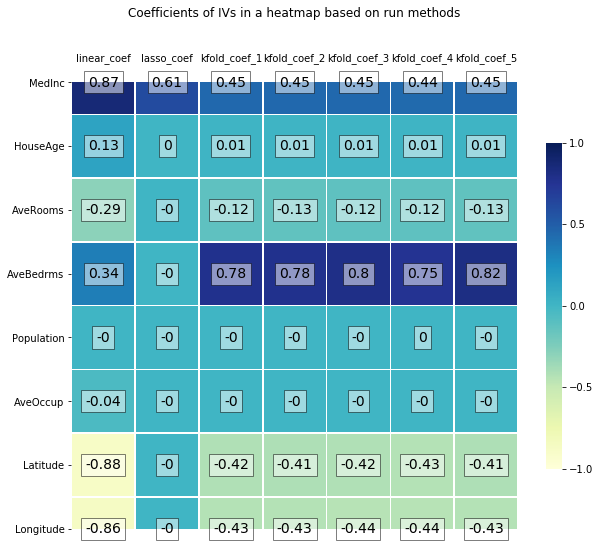

In [17]:
f, ax = plt.subplots(figsize=(10, 15)) 
# mask = np.zeros_like(coef_df, dtype=np.bool)
# mask[np.triu_indices_from(mask)]= True
heatmap = sns.heatmap(round(coef_df,2),
                      square = True,
                      linewidths = .5,
                      cmap = "YlGnBu",
                      cbar_kws = {"shrink": .4, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 14, "color" : "black", "backgroundcolor": "white", "bbox": dict(facecolor='white', alpha=0.5)})

#add the column names as labels
# f.patch.set_facecolor('slategray')
plt.title("Coefficients of IVs in a heatmap based on run methods\n\n")

ax.set_yticklabels(coef_df.index, rotation = 0)
ax.set_xticklabels(coef_df.columns + "\n ")
ax.xaxis.set_ticks_position("top")

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

### Looking at the the coef_df we can analyse the effect of each independent variable on out target
### The main impactful coefficients can be seen to be MedInc, AveBedrms + AveRooms (Multicollinearity), Latitude, and Longitude
